# Tensorflow Basics

### Tensor

In [48]:
import tensorflow as tf
import numpy      as np

In [8]:
# Tensor objects that only give reuslt after running a session
test_one = tf.constant( 'Hai' )
test_two = tf.constant( 'Hai Again' )

In [9]:
# with will open and close the session automatically
with tf.Session() as sess:
    result = sess.run( test_one + ' ' + test_two )

In [10]:
print( result )

b'Hai Hai Again'


In [14]:
const     = tf.constant( 10 )
fill_mat  = tf.fill( ( 4, 4 ), 10 )
fill_zero = tf.zeros( ( 4, 4 ), 10 )
tf_random = tf.random_normal( ( 4, 4 ), mean = 0, stddev = 1.0 )

In [15]:
ops = [ const, fill_mat, fill_zero, tf_random ]

In [16]:
# Only for Jupyter: do not have to instantiate a running session after the first
sess = tf.InteractiveSession()

In [17]:
for op in ops:
    print( sess.run( op ) )

10
[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]
[[False False False False]
 [False False False False]
 [False False False False]
 [False False False False]]
[[-1.9078761  -0.4193542   0.40309888  0.1533485 ]
 [ 0.6267731  -0.4981341   0.12124081 -0.38809523]
 [-0.51017606  0.8532236  -1.084801   -1.5099545 ]
 [ 0.22547117  1.4008657   0.6124136  -3.0606313 ]]


In [18]:
a = tf.constant( [ [ 1, 2 ],
                   [ 3, 4 ] ] )

In [19]:
b = tf.constant( [ [10], [100] ] )

In [20]:
result = tf.matmul( a, b )

In [21]:
sess.run( result )

array([[210],
       [430]])

### Graphs

In [24]:
n1 = tf.constant( 1 )
n2 = tf.constant( 2 )

n3 = n1 + n2

In [25]:
result = sess.run( n3 )

In [26]:
print( result )

3


In [27]:
g = tf.Graph()

In [28]:
graph_one = tf.get_default_graph

In [29]:
print( graph_one )

<function get_default_graph at 0x000001EA6938CB70>


In [30]:
graph_two = tf.Graph()

In [31]:
print( graph_two )

In [34]:
# Notice graphs have different memory locations
# Below sets graph_two as a default
with graph_two.as_default():
    print( graph_two is tf.get_default_graph() )

True


### Variables and Placeholders

In [41]:
# Placeholders are used to feed in training examples
# Need expected dtype and shape argument
the_tensor = tf.random_uniform( ( 4, 4 ), 0, 1 )
the_var    = tf.Variable( initial_value = the_tensor )

# Initializer Object
init       = tf.global_variables_initializer()

In [42]:
sess.run( init )

In [43]:
sess.run( the_var )

array([[3.7869239e-01, 6.6265607e-01, 5.4991722e-02, 3.6073697e-01],
       [3.4942162e-01, 3.1531870e-01, 9.1954803e-01, 2.1283174e-01],
       [9.3010819e-01, 4.9662590e-04, 2.0483696e-01, 5.2127290e-01],
       [6.8978012e-01, 9.0602279e-02, 5.2677870e-01, 1.7131460e-01]],
      dtype=float32)

In [46]:
# None because we may not know the batch size before running the network
the_place = tf.placeholder( tf.float32, shape = ( None, 5 ) )

### Build Network

In [50]:
# Build Graph
# Init Session
# Feed Data for Output

# Steps
    # variable w and variable x are input into matrix multiplication
    # This result is sent to an operation that adds the matmul result to a bias
    # The result of this addition is then sent to an activation function
    
np.random.seed( 101 )
tf.set_random_seed( 101 )

In [52]:
rand_a = np.random.uniform( 0, 100, ( 5, 5 ) )
rand_b = np.random.uniform( 0, 100, ( 5, 1 ) )

In [53]:
a = tf.placeholder( tf.float32 )
b = tf.placeholder( tf.float32 )

In [54]:
add_op = a + b
mul_op = a * b

In [63]:
with tf.Session() as sess:
    # since a and b are placeholder objects for float32, the feed_dict supplies these with values when the session is run
    add_result = sess.run( add_op, feed_dict = { a : rand_a, b : rand_b } )
    print( add_result )
    
    add_result = sess.run( mul_op, feed_dict = { a : rand_a, b : rand_b } )
    print( add_result )

In [64]:
n_features      = 10
n_dense_neurons = 3

x = tf.placeholder( tf.float32, ( None, n_features ) )
W = tf.Variable( tf.random_normal( [ n_features, n_dense_neurons ] ) )
b = tf.Variable( tf.ones( [ n_dense_neurons ] ) )

In [65]:
xW = tf.matmul( x, W )
z  = tf.add( xW, b )

In [66]:
a = tf.sigmoid( z )

In [67]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run( init )
    
    layer_out = sess.run( a, feed_dict = { x : np.random.random( [ 1, n_features ] ) } )

In [68]:
print( layer_out )

[[0.4760314  0.30295327 0.18698418]]


### Regression Example

In [94]:
x_data  = np.linspace( 0, 10, 10 ) + np.random.uniform( -1.5, 1.5, 10 )
y_label = np.linspace( 0, 10, 10 ) + np.random.uniform( -1.5, 1.5, 10 )

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

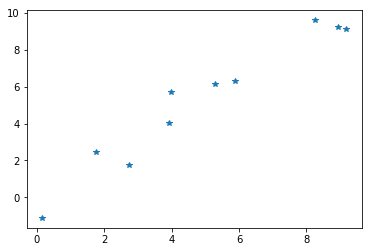

In [96]:
plt.plot( x_data, y_label, '*' )

In [79]:
m = tf.Variable( 0.44 )
b = tf.Variable( 0.87 )

In [81]:
error = 0

for x, y in zip( x_data, y_label ):
    y_hat  = m*x + b
    error += ( y - y_hat ) ** 2

In [82]:
optimizer = tf.train.GradientDescentOptimizer( learning_rate = 0.001 )
train     = optimizer.minimize( error )

In [83]:
init = tf.global_variables_initializer()

In [88]:
with tf.Session() as sess:
    sess.run( init )
    
    training_steps = 100
    
    for i in range( training_steps ):
        sess.run( train )
        
    final_slope, final_intercept = sess.run( [ m, b ] )

In [89]:
x_test      = np.linspace( -1, 11, 10 )
y_pred_plot = final_slope*x_test + final_intercept

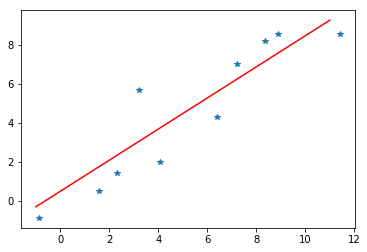

In [90]:
plt.plot( x_test, y_pred_plot, 'r' )
plt.plot( x_data, y_label, '*' )

In [97]:
import numpy  as np 
import pandas as pd

In [98]:
x_data = np.linspace( 0.0, 10.0, 1000000 ) 
noise  = np.random.randn( len( x_data ) )

In [99]:
y_true = ( 0.5 * x_data ) + 5 + noise

In [100]:
x_df = pd.DataFrame( data = x_data, columns = [ 'X' ] )
y_df = pd.DataFrame( data = y_true, columns = [ 'Y' ] )

df = pd.concat( [ x_df, y_df ], axis = 1 )

In [101]:
df.head()

,X,Y
0,0.00000,5.539118
1,0.00001,5.669779
2,0.00002,3.729526
3,0.00003,4.553834
4,0.00004,5.779495


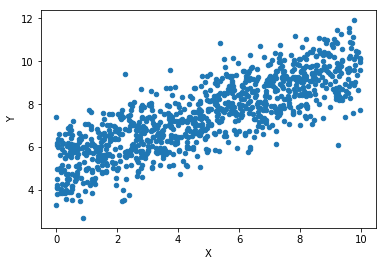

In [102]:
df.sample( n = 1000 ).plot( kind = 'scatter', x = 'X', y = 'Y' )

In [106]:
# How many observations are put through the network at a time
batch_size = 8

# Random variables that get updated by the network per batch
m = tf.Variable( 0.814 )
b = tf.Variable( 0.176 )

# Graph elements created
xph = tf.placeholder( tf.float32, [ batch_size ] )
yph = tf.placeholder( tf.float32, [ batch_size ] )

# Y estimate
y_model = m*xph + b

# Error from the true value and the predicted
error = tf.reduce_sum( tf.square( yph - y_model ) )

# Use gradient descent to minimize the error with a small learning rate
optimizer = tf.train.GradientDescentOptimizer( learning_rate = 0.001 )
train     = optimizer.minimize( error )

# Instantiate the tensors
init = tf.global_variables_initializer()

# Open session (with closes when done automatically)
with tf.Session() as sess:
    sess.run( init )
    
    # Run session for 1000 batches of 8 observations
    batches = 1000
    
    # For each batch
    for i in range( batches ):
        # Select 8 observations randomly
        rand_index = np.random.randint( len( x_data ), size = batch_size )
        feed       = { xph : x_data[ rand_index], yph : y_true[ rand_index ] }
        
        # Minimize the error using the data
        sess.run( train, feed_dict = feed )
        
    # Get the slope and the bias
    model_m, model_b = sess.run( [ m, b ] )

In [107]:
model_m

0.5206859

In [108]:
model_b

4.915369

In [109]:
feat_cols = [ tf.feature_column.numeric_column( 'x', shape = [ 1 ] ) ]
estimator = tf.estimator.LinearRegressor( feature_columns = feat_cols )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\andre\\AppData\\Local\\Temp\\tmpm_3ah94a', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001EA05B69BA8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [110]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_eval, y_train, y_eval = train_test_split( x_data, y_true, test_size = 0.3 ) 

In [118]:
input_func       = tf.estimator.inputs.numpy_input_fn( { 'x' : X_train}, y_train, batch_size = 8, num_epochs = None, shuffle = True )
train_input_func = tf.estimator.inputs.numpy_input_fn( { 'x' : X_train}, y_train, batch_size = 8, num_epochs = 1000, shuffle = False )
eval_input_func  = tf.estimator.inputs.numpy_input_fn( { 'x' : X_eval},  y_eval,  batch_size = 8, num_epochs = 1000, shuffle = False )

In [119]:
estimator.train( input_fn = input_func, steps = 1000 )

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\andre\AppData\Local\Temp\tmpm_3ah94a\model.ckpt.
INFO:tensorflow:loss = 452.50406, step = 1
INFO:tensorflow:global_step/sec: 896.867
INFO:tensorflow:loss = 35.89848, step = 101 (0.113 sec)
INFO:tensorflow:global_step/sec: 1139.41
INFO:tensorflow:loss = 38.359367, step = 201 (0.088 sec)
INFO:tensorflow:global_step/sec: 1126.61
INFO:tensorflow:loss = 24.69315, step = 301 (0.088 sec)
INFO:tensorflow:global_step/sec: 1285.48
INFO:tensorflow:loss = 19.795876, 

In [121]:
train_metrics = estimator.evaluate( input_fn = train_input_func, steps = 1000 )

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-04-23:41:58
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\andre\AppData\Local\Temp\tmpm_3ah94a\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-02-04-23:41:59
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0824012, global_step = 1000, label/mean = 7.50686, loss = 8.659209, prediction/mean = 7.430006
INFO:tensorflow:Saving 'checkpoint_path' s

In [122]:
eval_metrics = estimator.evaluate( input_fn = eval_input_func, steps = 1000 )

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-04-23:42:39
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\andre\AppData\Local\Temp\tmpm_3ah94a\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-02-04-23:42:39
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1100793, global_step = 1000, label/mean = 7.4902434, loss = 8.880634, prediction/mean = 7.40454
INFO:tensorflow:Saving 'checkpoint_path' 

In [123]:
# Sign of overfitting is if TRAIN loss is much larger than TEST loss
print( 'TRAIN' )
print( train_metrics )

TRAIN
{'average_loss': 1.0824012, 'label/mean': 7.50686, 'loss': 8.659209, 'prediction/mean': 7.430006, 'global_step': 1000}


In [124]:
print( 'EVAL' )
print( eval_metrics )

EVAL
{'average_loss': 1.1100793, 'label/mean': 7.4902434, 'loss': 8.880634, 'prediction/mean': 7.40454, 'global_step': 1000}


In [126]:
brand_new_data   = np.linspace( 0, 10, 10 )
input_fn_predict = tf.estimator.inputs.numpy_input_fn( { 'x' : brand_new_data }, shuffle = False )

In [128]:
list( estimator.predict( input_fn = input_fn_predict ) )

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\andre\AppData\Local\Temp\tmpm_3ah94a\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4180007], dtype=float32)},
 {'predictions': array([5.0849195], dtype=float32)},
 {'predictions': array([5.751838], dtype=float32)},
 {'predictions': array([6.4187565], dtype=float32)},
 {'predictions': array([7.0856752], dtype=float32)},
 {'predictions': array([7.752594], dtype=float32)},
 {'predictions': array([8.419513], dtype=float32)},
 {'predictions': array([9.0864315], dtype=float32)},
 {'predictions': array([9.75335], dtype=float32)},
 {'predictions': array([10.420269], dtype=float32)}]

In [129]:
predictions = []

for pred in estimator.predict( input_fn = input_fn_predict ):
    predictions.append( pred[ 'predictions' ] )

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\andre\AppData\Local\Temp\tmpm_3ah94a\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [130]:
predictions

[array([4.4180007], dtype=float32),
 array([5.0849195], dtype=float32),
 array([5.751838], dtype=float32),
 array([6.4187565], dtype=float32),
 array([7.0856752], dtype=float32),
 array([7.752594], dtype=float32),
 array([8.419513], dtype=float32),
 array([9.0864315], dtype=float32),
 array([9.75335], dtype=float32),
 array([10.420269], dtype=float32)]

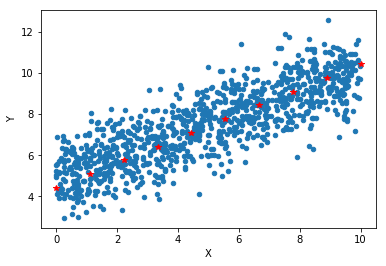

In [132]:
df.sample( n = 1000 ).plot( kind = 'scatter', x = 'X', y = 'Y' )
plt.plot( brand_new_data, predictions, 'r*' )

### Classification Example

In [134]:
diabetes = pd.read_csv( r'C:\Users\andre\Desktop\GitHub\Data\pima-indians-diabetes.csv' )

In [135]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [136]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [137]:
cols_to_norm = [ 'Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
                 'Insulin', 'BMI', 'Pedigree' ]

In [138]:
# Normalize
diabetes[ cols_to_norm ] = diabetes[ cols_to_norm ].apply( lambda x : ( x - x.min() ) / ( x.max() - x.min() ) )

In [139]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [140]:
num_preg = tf.feature_column.numeric_column( 'Number_pregnant' )
plasma   = tf.feature_column.numeric_column( 'Glucose_concentration' )
pressure = tf.feature_column.numeric_column( 'Blood_pressure' )
tricep   = tf.feature_column.numeric_column( 'Triceps' )
insulin  = tf.feature_column.numeric_column( 'Insulin' )
bmi      = tf.feature_column.numeric_column( 'BMI' )
pedigree = tf.feature_column.numeric_column( 'Pedigree' )
age      = tf.feature_column.numeric_column( 'Age' )

In [144]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list( 'Group', [ 'A', 'B', 'C', 'D' ] )

In [143]:
# hash_bucket_size is the number of levels in the response
assigned_group = tf.feature_column.categorical_column_with_hash_bucket( 'Group', hash_bucket_size = 4 )

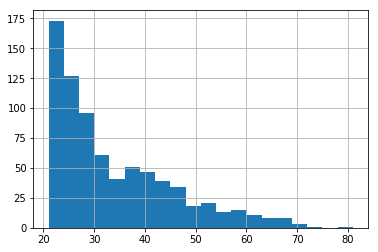

In [145]:
diabetes[ 'Age' ].hist( bins = 20 )

In [146]:
age_bucket = tf.feature_column.bucketized_column( age, boundaries = [ 20, 30, 40, 50, 60, 70, 80 ] )

In [147]:
feat_cols = [ num_preg, plasma, pressure, tricep, insulin, bmi, pedigree, age_bucket ]

In [148]:
x_data = diabetes.drop( 'Class', axis = 1 )

In [149]:
labels = diabetes[ 'Class' ]

In [150]:
X_train, X_test, y_train, y_test = train_test_split( x_data, labels, test_size = 0.3, random_state = 101 )

In [152]:
input_func = tf.estimator.inputs.pandas_input_fn( x = X_train, y = y_train, batch_size = 10, num_epochs = 1000, shuffle = True )

In [153]:
model = tf.estimator.LinearClassifier( feature_columns = feat_cols, n_classes = 2 )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\andre\\AppData\\Local\\Temp\\tmpf4ozd87w', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001EA0B629198>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [154]:
model.train( input_fn = input_func, steps = 1000 )

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\andre\AppData\Local\Temp\tmpf4ozd87w\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 293.496
INFO:tensorflow:loss = 8.942215, step = 101 (0.343 sec)
INFO:tensorflow:global_step/sec: 536.626
INFO:tensorflow:loss = 3.748193, step = 201 (0.185 sec)
INFO:tensorflow:global_step/sec: 475.201
INFO:tensorflow:loss = 5.0555105, step = 301 (0.214 sec)
INFO:tensorflow:global_step/sec: 459.943
INFO:tensorflow:loss = 3.925143, step = 401 (0.214 sec)
INFO:tensorflow:global_step/sec: 426.645
INFO:tensorflow:loss = 9.310125, step = 501 (0.237 sec)
INFO:tensorflow:global_step/sec: 482.09
INFO:tensorflow:loss = 6.562126, step = 601 (0.206 sec)
INFO:tensorflow:global_step/sec: 44

In [155]:
eval_input_func = tf.estimator.inputs.pandas_input_fn( x = X_test, y = y_test, batch_size = 10, num_epochs = 1, shuffle = False )

In [157]:
results = model.evaluate( eval_input_func )

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-05-00:56:56
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\andre\AppData\Local\Temp\tmpf4ozd87w\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-02-05-00:56:57
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7316017, accuracy_baseline = 0.64935064, auc = 0.8003704, auc_precision_recall = 0.65236866, average_loss = 0.52577484, global_step = 1000, label/mean = 0.35064936, loss = 5.0605826, precision = 0.62666667, prediction/mean = 0.38068533, recall = 0.5802469
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\andre\AppData\Local\Temp\tmpf4ozd87w\model.ckpt-1000


In [158]:
results

{'accuracy': 0.7316017,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8003704,
 'auc_precision_recall': 0.65236866,
 'average_loss': 0.52577484,
 'label/mean': 0.35064936,
 'loss': 5.0605826,
 'precision': 0.62666667,
 'prediction/mean': 0.38068533,
 'recall': 0.5802469,
 'global_step': 1000}

In [159]:
pred_input_func = tf.estimator.inputs.pandas_input_fn( x = X_test, batch_size = 1, shuffle = False, num_epochs = 1 )

In [160]:
predictions = model.predict( pred_input_func )

In [161]:
my_pred = list( predictions )

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\andre\AppData\Local\Temp\tmpf4ozd87w\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [162]:
my_pred

[{'logits': array([0.0948813], dtype=float32),
  'logistic': array([0.52370256], dtype=float32),
  'probabilities': array([0.47629747, 0.52370256], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.66665125], dtype=float32),
  'logistic': array([0.6607529], dtype=float32),
  'probabilities': array([0.33924708, 0.6607529 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.39862496], dtype=float32),
  'logistic': array([0.40164277], dtype=float32),
  'probabilities': array([0.5983572 , 0.40164274], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.7175766], dtype=float32),
  'logistic': array([0.32792684], dtype=float32),
  'probabilities': array([0.6720731 , 0.32792684], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits

In [163]:
dnn_model = tf.estimator.DNNClassifier( hidden_units = [ 10, 10, 10 ], feature_columns = feat_cols, n_classes = 2 )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\andre\\AppData\\Local\\Temp\\tmpj40yi0m9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001EA08845080>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [166]:
# If create your own embedded column via categorical list
embedded_group_col = tf.feature_column.embedding_column( assigned_group, dimension = 4 )

In [168]:
feat_cols = [ num_preg, plasma, pressure, tricep, insulin, bmi, pedigree, embedded_group_col, age_bucket ]

In [169]:
input_func = tf.estimator.inputs.pandas_input_fn( X_train, y_train, batch_size = 10, num_epochs = 1000, shuffle = True )

In [170]:
dnn_model = tf.estimator.DNNClassifier( hidden_units = [ 10, 10, 10 ], feature_columns = feat_cols, n_classes = 2 )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\andre\\AppData\\Local\\Temp\\tmpt8_lofp9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001EA0C95BF28>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [171]:
dnn_model.train( input_fn = input_func, steps = 1000 )

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\andre\AppData\Local\Temp\tmpt8_lofp9\model.ckpt.
INFO:tensorflow:loss = 6.7819614, step = 1
INFO:tensorflow:global_step/sec: 262.696
INFO:tensorflow:loss = 4.7282734, step = 101 (0.383 sec)
INFO:tensorflow:global_step/sec: 514.194
INFO:tensorflow:loss = 5.4226384, step = 201 (0.194 sec)
INFO:tensorflow:global_step/sec: 563.302
INFO:tensorflow:loss = 7.2791786, step = 301 (0.180 sec)
INFO:tensorflow:global_step/sec: 522.226
INFO:tensorflow:loss = 4.1582637, step = 401 (0.193 sec)
INFO:tensorflow:global_step/sec: 522.154
INFO:tensorflow:loss = 4.74926, step = 501 (0.189 sec)
INFO:tensorflow:global_step/sec: 460.983
INFO:tensorflow:loss = 8.344982, step = 601 (0.214 sec)
INFO:tensorflow:global_step/sec

In [172]:
eval_input_func = tf.estimator.inputs.pandas_input_fn( x = X_test, y = y_test, batch_size = 10, num_epochs = 1, shuffle = False )

In [173]:
dnn_model.evaluate( eval_input_func )

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-05-01:05:54
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\andre\AppData\Local\Temp\tmpt8_lofp9\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-02-05-01:05:55
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.77056277, accuracy_baseline = 0.64935064, auc = 0.8260082, auc_precision_recall = 0.6717447, average_loss = 0.4948228, global_step = 1000, label/mean = 0.35064936, loss = 4.7626696, precision = 0.67948717, prediction/mean = 0.3479227, recall = 0.654321
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\andre\AppData\Local\Temp\tmpt8_lofp9\model.ckpt-1000


{'accuracy': 0.77056277,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8260082,
 'auc_precision_recall': 0.6717447,
 'average_loss': 0.4948228,
 'label/mean': 0.35064936,
 'loss': 4.7626696,
 'precision': 0.67948717,
 'prediction/mean': 0.3479227,
 'recall': 0.654321,
 'global_step': 1000}

### Save Model

In [1]:
saver = tf.train.Saver()

# Add the session run here

saver.save( sess. 'models/test_model_saved.ckpt' )

In [ ]:
# Load model
with tf.Session() as sess:
    saver.restore( sess, 'models/test_model_saved.ckpt' )
    restored_model = sess.run( stuff_here )

Good rule of thumb is to save the model for train data and then restore the moel for the testing phase.